In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
processed_data = pd.read_csv("./data/processed_data.csv")
handled_skewed_data = pd.read_csv("./data/handled_skewed_data.csv")
scaled_data = pd.read_csv("./data/scaled_data.csv")
scaled_skewed_data = pd.read_csv("./data/scaled_skewed_data.csv")

In [3]:
print(type(processed_data))
print(type(handled_skewed_data))
print(type(scaled_data))
print(type(scaled_skewed_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
# Initialize a list to store evaluation metrics
results_df = pd.DataFrame(columns=["Model", "n_clusters", "Silhouette Score"])

# Define clustering models
clustering_models = [
    {"model": KMeans, "name": "KMeans", "Dataset_Name": ""},
    # BFR model
]

In [5]:
def plot_elbow(data, n_clusters_range=range(2, 15)):
    """
    Computes the within-cluster sum of squares (WCSS) for a range of cluster numbers
    and plots the Elbow method to help determine the optimal number of clusters.

    Parameters:
    data (array-like or dataframe): The input data for clustering.
    n_clusters_range (range): The range of cluster numbers to evaluate. Default is range(2, 15).
    """
    # Calculate WCSS for each number of clusters
    wcss = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    # Plot the Elbow method
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range, wcss, marker='o', linestyle='--')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

In [6]:
def plot_clustering(data, num_clusters, results_df):
    results = []

    for model_dict in clustering_models:
        name = model_dict["name"]
        
        model = model_dict["model"](n_clusters=num_clusters, n_init=10)
        labels = model.fit_predict(data)
        
        # Calculate evaluation metrics
        if len(set(labels)) > 1:  # Ensure more than one cluster is formed
            silhouette_avg = silhouette_score(data, labels)
        else:
            silhouette_avg = -1  # Invalid silhouette score
        
        results.append({"Model": name, "n_clusters": num_clusters, "Silhouette Score": silhouette_avg})
        
        # Perform PCA for visualization
        pca = PCA(n_components=2)
        components_2d = pca.fit_transform(data)
        pca = PCA(n_components=3)
        components_3d = pca.fit_transform(data)
        
        # 2D Visualization
        plt.figure(figsize=(8, 6))
        plt.scatter(components_2d[:, 0], components_2d[:, 1], c=labels, cmap='viridis', s=50)
        plt.title(f'2D PCA - {name} with n_clusters={num_clusters}')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.colorbar(label='Cluster')
        plt.show()
        
        # 3D Visualization
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(components_3d[:, 0], components_3d[:, 1], components_3d[:, 2], c=labels, cmap='viridis', s=50)
        ax.set_title(f'3D PCA - {name} with n_clusters={num_clusters}')
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_zlabel('PCA Component 3')
        fig.colorbar(scatter, ax=ax, label='Cluster')
        plt.show()
        
        # Add cluster labels to data DataFrame
        data[f'Cluster_Labels_{name}'] = labels

    # Convert results to DataFrame
    new_results_df = pd.DataFrame(results)
    results_df = pd.concat([results_df, new_results_df], ignore_index=True)
    return results_df, data

# processed data

In [7]:
processed_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,0,0,0,0,0,1


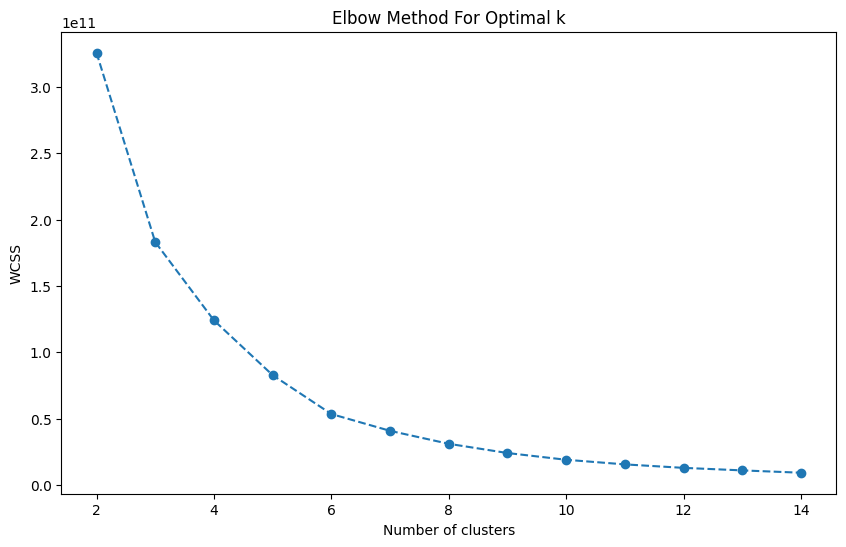

In [8]:
plot_elbow(processed_data, n_clusters_range=range(2, 15))

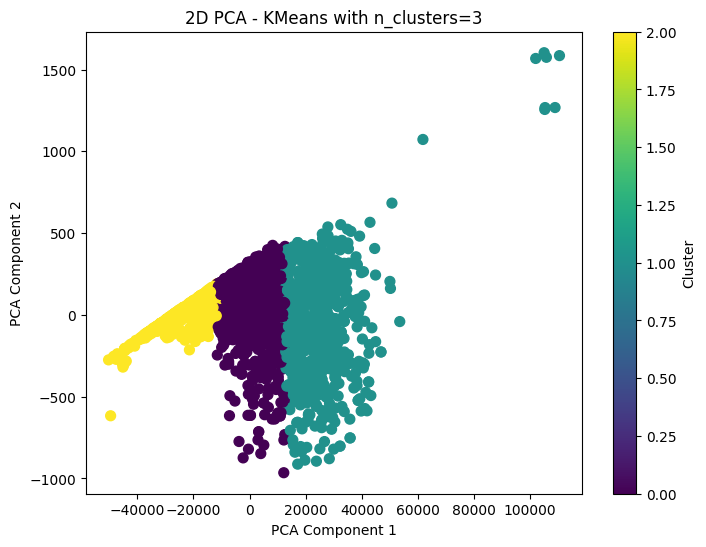

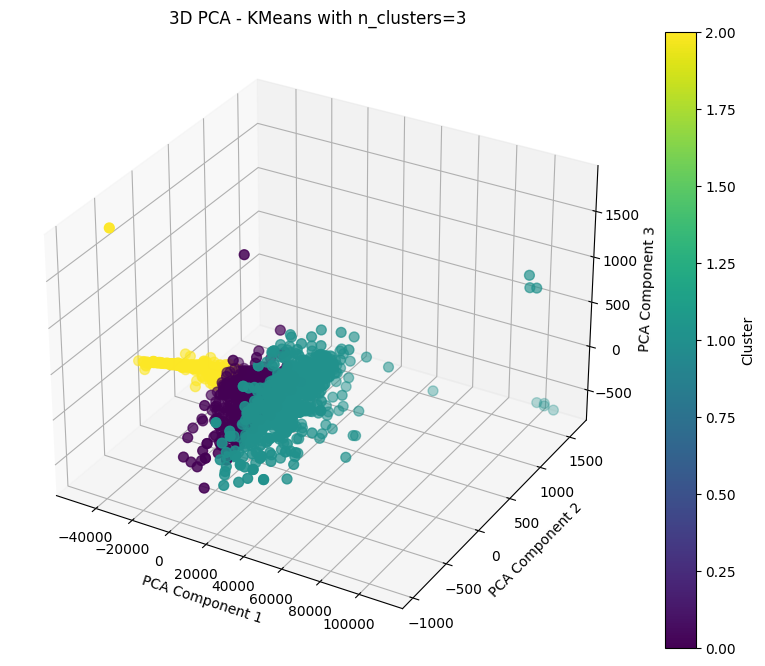

    Model n_clusters  Silhouette Score
0  KMeans          3          0.544542


In [9]:
results_df, processed_data = plot_clustering(processed_data, 3, results_df)
print(results_df)

# handled skewed data

In [10]:
handled_skewed_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,58138.0,0,0,58,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,...,0,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,...,0,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,...,0,0,0,1,0,0,0,1,0,0
3,26646.0,1,0,26,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,...,0,0,0,1,0,0,0,1,0,0
4,58293.0,1,0,94,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,...,0,1,0,0,0,0,0,0,0,1


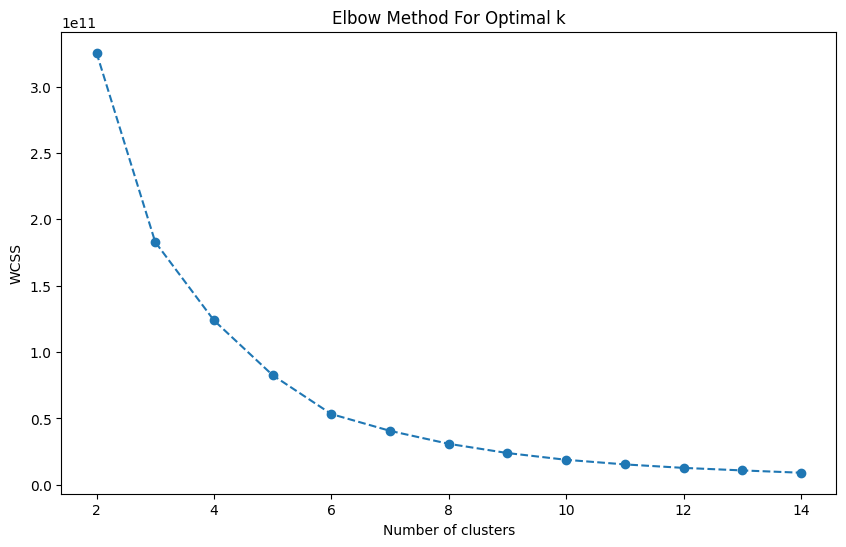

In [11]:
plot_elbow(handled_skewed_data, n_clusters_range=range(2, 15))

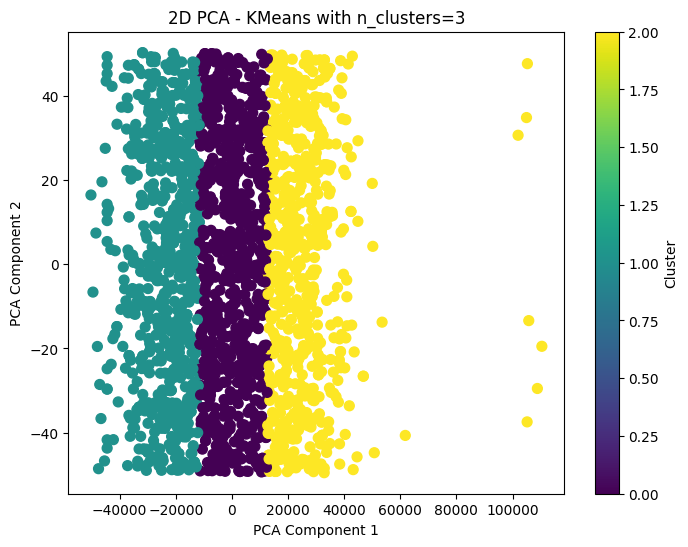

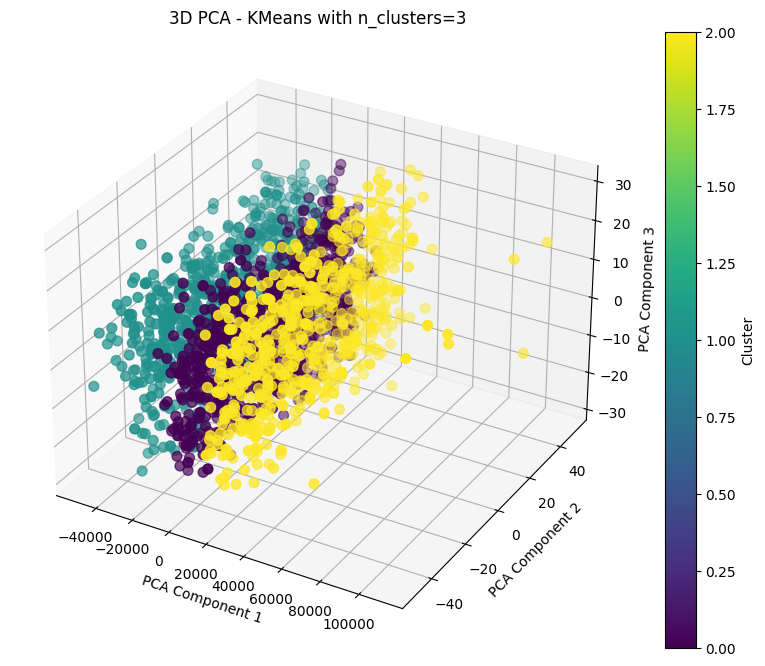

    Model n_clusters  Silhouette Score
0  KMeans          3          0.544542
1  KMeans          3          0.545503


In [12]:
results_df, handled_skewed_data = plot_clustering(handled_skewed_data, 3, results_df)
print(results_df)

# scaled data

In [13]:
scaled_data.head()

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.288947,-0.824939,-0.930615,0.306856,0.692865,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,...,-0.339429,-0.793560,1.915218,-0.590434,-0.188851,-0.314279,-0.157315,0.992870,-0.445292,-0.526293
1,-0.262003,1.032627,0.905974,-0.383971,-0.131421,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,...,-0.339429,-0.793560,1.915218,-0.590434,-0.188851,-0.314279,-0.157315,0.992870,-0.445292,-0.526293
2,0.918423,-0.824939,-0.930615,-0.798467,-0.543564,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,...,-0.339429,-0.793560,-0.522134,1.693668,-0.188851,-0.314279,-0.157315,0.992870,-0.445292,-0.526293
3,-1.182183,1.032627,-0.930615,-0.798467,0.280722,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,...,-0.339429,-0.793560,-0.522134,1.693668,-0.188851,-0.314279,-0.157315,0.992870,-0.445292,-0.526293
4,0.296187,1.032627,-0.930615,1.550344,-0.131421,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,...,-0.339429,1.260144,-0.522134,-0.590434,-0.188851,-0.314279,-0.157315,-1.007181,-0.445292,1.900081


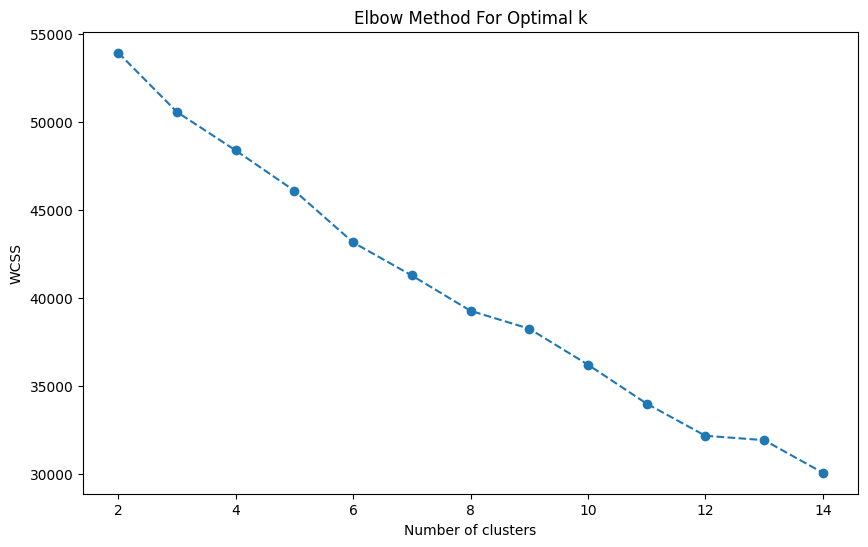

In [14]:
plot_elbow(scaled_data, n_clusters_range=range(2, 15))

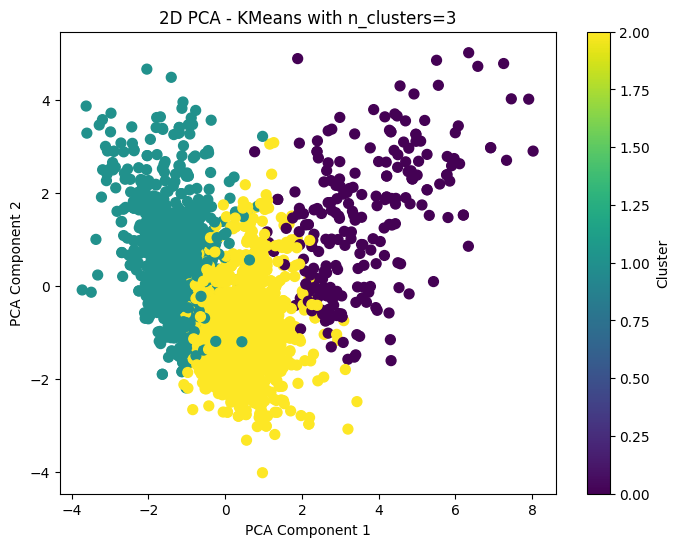

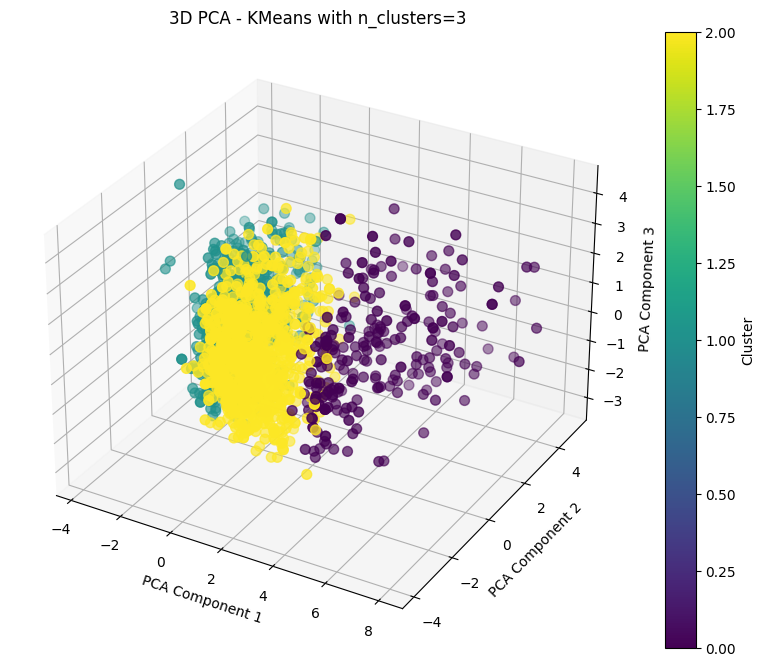

    Model n_clusters  Silhouette Score
0  KMeans          3          0.544542
1  KMeans          3          0.545503
2  KMeans          3          0.073211


In [15]:
results_df, scaled_data = plot_clustering(scaled_data, 3, results_df)
print(results_df)

# scaled skewed data

In [16]:
scaled_skewed_data.head()

,Income,Kidhome,Teenhome,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.288947,-0.824939,-0.930615,0.306856,0.692865,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,...,-0.339429,-0.793560,1.915218,-0.590434,-0.188851,-0.314279,-0.157315,0.992870,-0.445292,-0.526293
1,-0.262003,1.032627,0.905974,-0.383971,-0.131421,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,...,-0.339429,-0.793560,1.915218,-0.590434,-0.188851,-0.314279,-0.157315,0.992870,-0.445292,-0.526293
2,0.918423,-0.824939,-0.930615,-0.798467,-0.543564,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,...,-0.339429,-0.793560,-0.522134,1.693668,-0.188851,-0.314279,-0.157315,0.992870,-0.445292,-0.526293
3,-1.182183,1.032627,-0.930615,-0.798467,0.280722,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,...,-0.339429,-0.793560,-0.522134,1.693668,-0.188851,-0.314279,-0.157315,0.992870,-0.445292,-0.526293
4,0.296187,1.032627,-0.930615,1.550344,-0.131421,-0.28041,-0.284104,-0.279482,-0.262362,-0.116616,...,-0.339429,1.260144,-0.522134,-0.590434,-0.188851,-0.314279,-0.157315,-1.007181,-0.445292,1.900081


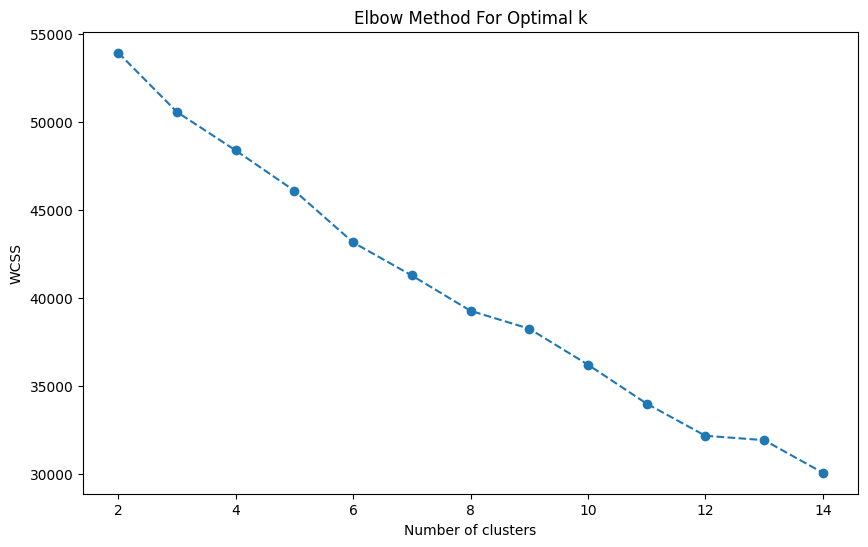

In [17]:
plot_elbow(scaled_skewed_data, n_clusters_range=range(2, 15))

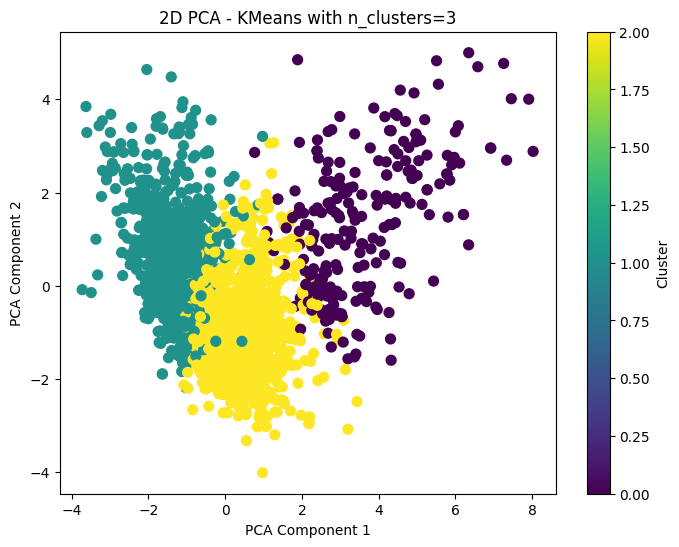

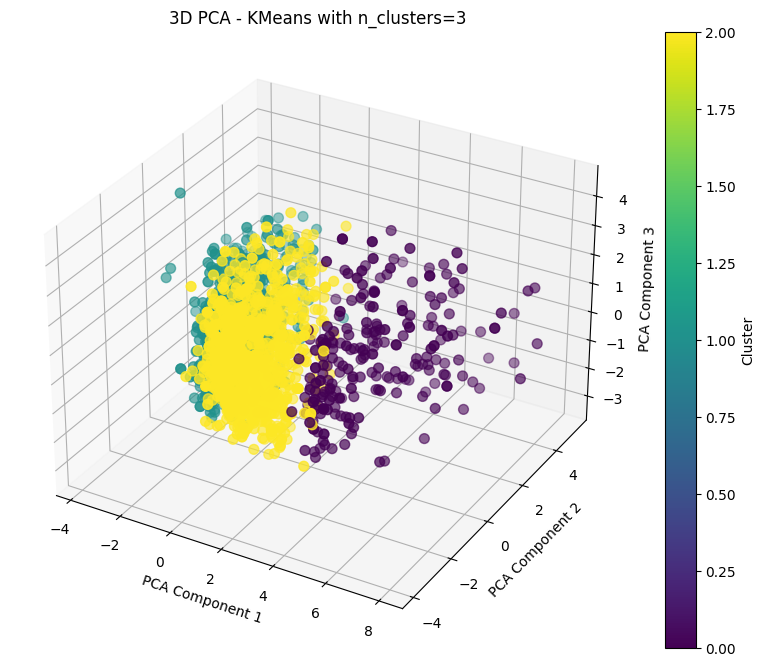

    Model n_clusters  Silhouette Score
0  KMeans          3          0.544542
1  KMeans          3          0.545503
2  KMeans          3          0.073211
3  KMeans          3          0.073211


In [18]:
results_df, scaled_skewed_data = plot_clustering(scaled_skewed_data, 3, results_df)
print(results_df)

# Extract charasticts from handled scaled data 

In [19]:
results_df

,Model,n_clusters,Silhouette Score
0,KMeans,3,0.544542
1,KMeans,3,0.545503
2,KMeans,3,0.073211
3,KMeans,3,0.073211


In [20]:
handled_skewed_data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Cluster_Labels_KMeans
0,58138.0,0,0,58,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,...,0,1,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,...,0,1,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,...,0,0,1,0,0,0,1,0,0,2
3,26646.0,1,0,26,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,...,0,0,1,0,0,0,1,0,0,1
4,58293.0,1,0,94,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,61223.0,0,1,46,6.565265,3.784190,5.209486,3.761200,4.779123,5.513429,...,1,0,0,0,0,0,1,0,0,0
2232,64014.0,2,1,56,6.008813,0.000000,3.433987,0.000000,0.000000,2.197225,...,0,0,1,0,0,0,0,0,1,0
2233,56981.0,0,0,91,6.812345,3.891820,5.384495,3.496508,2.564949,3.218876,...,0,0,0,0,0,0,1,0,0,0
2234,69245.0,0,1,8,6.061457,3.433987,5.370638,4.394449,3.433987,4.127134,...,0,0,1,0,0,0,0,1,0,2
